In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# This will reload imports before executing code, allowing you to easily change contents of custom scripts
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

In [4]:
import os, sys
sys.path.append('/home/sandm/Notebooks/stay_classification/src/')

# Random trajectory creation

Create a (random) sequence of signaling events, _eg_ GPS measurements, with locationsobscured by noise. 


**Note** the signaling events for a given user, form a set $\mathcal{E} :=  \{e_i = (\mathbf{x}_i, t_i), i=[0,N-1] \; | \; t_{i+1}>t_i\}$

## Configs

There are a few main configs:
* the minimal duration of the stays
* the minimal distance between two adjacent stays
* the rest are just ranges for some stochastics which control the noise 

In [5]:
configs = {
    'time_thresh':1/6,
    'dist_thresh':0.5,
    'noise_min':0.02,
    'noise_max':0.15
}

## Create the trajectories

The trajectory is specified by a time array and a locations array. 

There are a few additional arrays, namely 
* one with the raw trajectory without the noise
    * these are used for evaluating the classification
* lists of the stays as segments defined by the pairs $[(\mathbf{x}_i, t_i)$, $(\mathbf{x}_i, t_j)]$
    * these are what should be identified

In [6]:
from synthetic_data.trajectory import get_stay_segs, get_adjusted_stays
from synthetic_data.trajectory_class import get_rand_traj

In [8]:
time_arr, raw_arr, noise_arr, segments = get_rand_traj(configs)
t_segs, x_segs = get_stay_segs(get_adjusted_stays(segments, time_arr))

## Visualizations

In [9]:
from synthetic_data.plotting import plot_trajectory

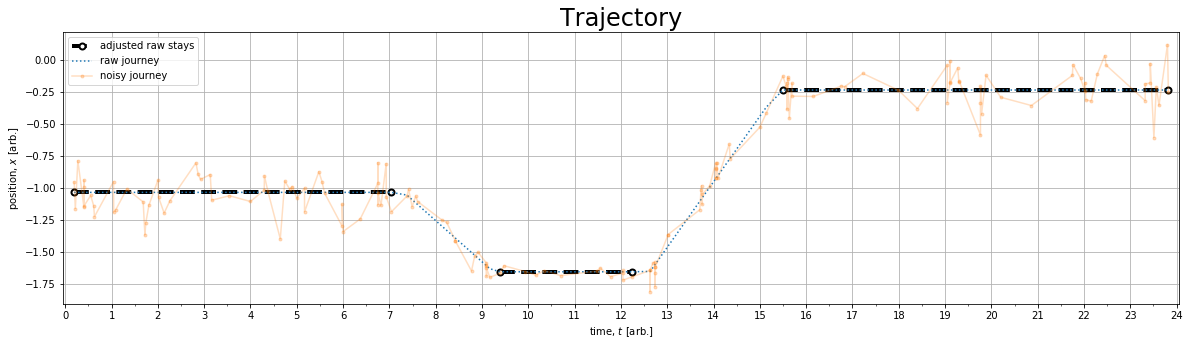

In [10]:
plot_trajectory(time_arr, raw_arr, noise_arr, t_segs, x_segs, configs['dist_thresh'])

## Save the trajectory

### Pickling

In [11]:
from synthetic_data.trajectory_class import pickle_trajectory
from datetime import datetime

In [12]:
stays_tag = int((x_segs.size)/3)
date_tag = datetime.today().strftime('%Y%m%d')
notes = ''
trajectory_tag = f"{date_tag}_trajectory_{stays_tag}stays__{notes}"
path_to_file =  "./testdata/" + trajectory_tag + ".pkl"
print(path_to_file)

./testdata/20200702_trajectory_3stays__.pkl


In [13]:
pickle_trajectory(time_arr, raw_arr, noise_arr, segments, None)

TypeError: expected str, bytes or os.PathLike object, not NoneType

### tabling

In [21]:
from synthetic_data.trajectory import get_stay_indices

In [15]:
true_indices = get_stay_indices(get_adjusted_stays(segments, time_arr), time_arr)

In [16]:
import pandas as pd

In [19]:
df = pd.DataFrame({'ID':time_arr.size*["#111111"], 'time':time_arr, 'x':raw_arr, 'nx':noise_arr, 'stay':bool(true_indices)})

In [20]:
df.head()

,ID,time,x,nx,stay
0,#111111,0.191667,-1.035904,-0.955205,True
1,#111111,0.217500,-1.035904,-1.162807,True
2,#111111,0.271944,-1.035904,-0.788748,True
3,#111111,0.401389,-1.035904,-1.146648,True
4,#111111,0.401389,-1.035904,-0.991189,True


In [ ]:
path_to_file =  "./testdata/" + trajectory_tag + ".csv"
df.to_csv(path_to_file, index=False)